In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('out_put_2.csv')

In [5]:
df.head()

,DATE,CHANCE_OF_PRECIPITATION,TEMPERATURE,FEELS_LIKE_TEMPERATURE,WIND_GUST,VISIBILITY,HUMIDITY,UV,WIND_DIRECTION,SPEED
0,2023-06-15 18:00:00,60,30,33,13,VG,73,1,WSW,7
1,2023-06-15 19:00:00,60,29,32,11,VG,80,0,WSW,6
2,2023-06-15 20:00:00,60,28,31,10,VG,82,0,WSW,6
3,2023-06-15 21:00:00,10,28,31,9,VG,84,0,WSW,5
4,2023-06-15 22:00:00,10,28,31,8,VG,86,0,SW,4


In [6]:
df.dtypes

DATE                       object
CHANCE_OF_PRECIPITATION     int64
TEMPERATURE                 int64
FEELS_LIKE_TEMPERATURE      int64
WIND_GUST                   int64
VISIBILITY                 object
HUMIDITY                    int64
UV                          int64
WIND_DIRECTION             object
SPEED                       int64
dtype: object

In [7]:
df_time = df[['DATE','CHANCE_OF_PRECIPITATION']]

In [8]:
df_time['DATE']=pd.to_datetime(df_time['DATE'])

C:\Users\ngois\AppData\Local\Temp\ipykernel_16236\167503841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['DATE']=pd.to_datetime(df_time['DATE'])


In [9]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATE                     403 non-null    datetime64[ns]
 1   CHANCE_OF_PRECIPITATION  414 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.6 KB


In [10]:
df_time=df_time.set_index('DATE')

In [11]:
df_time.head()

,CHANCE_OF_PRECIPITATION
DATE,
2023-06-15 18:00:00,60
2023-06-15 19:00:00,60
2023-06-15 20:00:00,60
2023-06-15 21:00:00,10
2023-06-15 22:00:00,10


In [12]:
df_time.tail(15)

,CHANCE_OF_PRECIPITATION
DATE,
2023-07-15 04:00:00,20
2023-07-15 07:00:00,10
2023-07-15 10:00:00,40
2023-07-15 13:00:00,70
2023-07-15 16:00:00,60
2023-07-15 19:00:00,30
2023-07-15 22:00:00,10
2023-07-16 01:00:00,10
2023-07-16 04:00:00,10


<Axes: xlabel='DATE'>

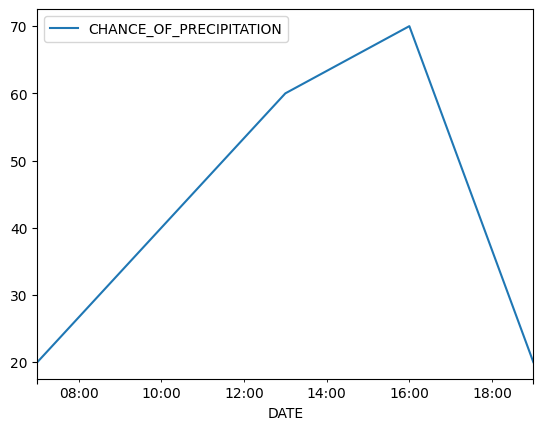

In [13]:
df_time.loc[(df_time.index > '2023-07-16 04:00:00') & (df_time.index < '2023-07-16 22:00:00')].plot()

<Axes: xlabel='DATE'>

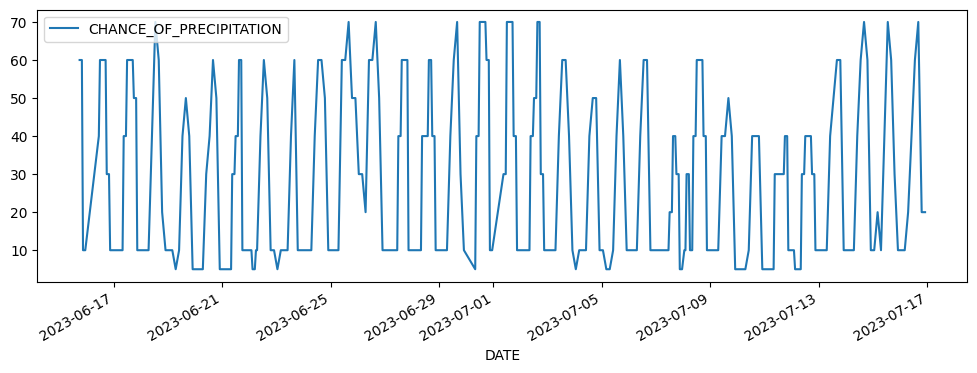

In [14]:
df_time.plot(figsize=(12,4))

<Axes: xlabel='DATE'>

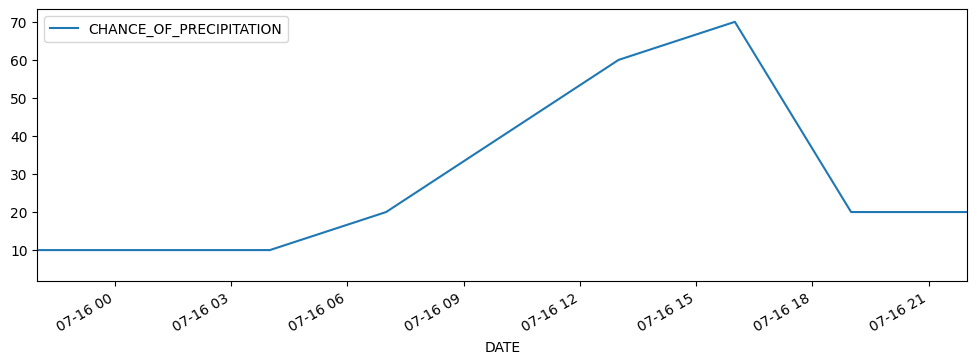

In [15]:
df_time.plot(xlim=['2023-07-15 22:00:00','2023-07-16 22:00:00'] ,figsize=(12,4))

<Axes: >

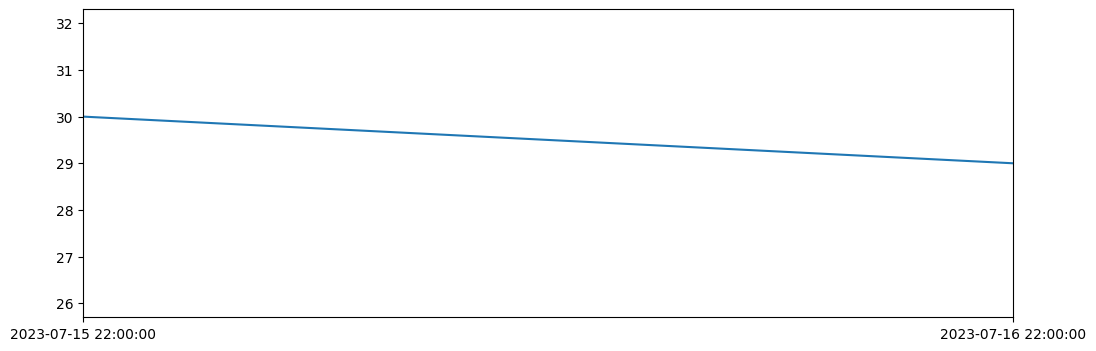

In [16]:
df['TEMPERATURE'].plot(xlim=['2023-07-15 22:00:00','2023-07-16 22:00:00'] ,figsize=(12,4))

In [17]:
df_time['Rolling 7 days']=df_time.rolling(7).mean()

<Axes: xlabel='DATE'>

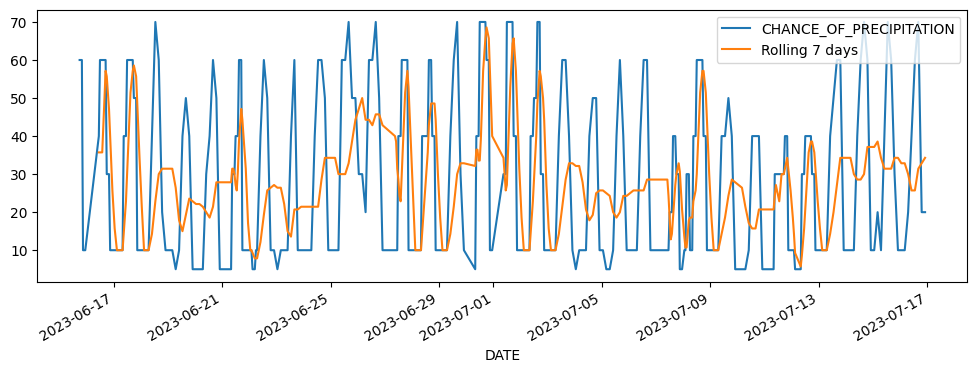

In [18]:
df_time.plot(figsize=(12,4))

# Feature

In [22]:
df_time['hour']=df_time.index.hour

In [23]:
df_time['dayofweek']=df_time.index.day_of_week

In [24]:
df_time

,CHANCE_OF_PRECIPITATION,hour,dayofweek
DATE,,,
2023-06-15 18:00:00,60,18.0,3.0
2023-06-15 19:00:00,60,19.0,3.0
2023-06-15 20:00:00,60,20.0,3.0
2023-06-15 21:00:00,10,21.0,3.0
2023-06-15 22:00:00,10,22.0,3.0
...,...,...,...
2023-07-16 10:00:00,40,10.0,6.0
2023-07-16 13:00:00,60,13.0,6.0
2023-07-16 16:00:00,70,16.0,6.0


In [25]:
def create_feature(dataframe):
    dataframe['hour']=dataframe.index.hour
    dataframe['dayofweek']=dataframe.index.day_of_week
    dataframe['quarter']=dataframe.index.quarter
    dataframe['month']=dataframe.index.month
    dataframe['year']=dataframe.index.year
    return dataframe
df_time=create_feature(df_time)

In [26]:
df_time.head()

,CHANCE_OF_PRECIPITATION,hour,dayofweek,quarter,month,year
DATE,,,,,,
2023-06-15 18:00:00,60,18.0,3.0,2.0,6.0,2023.0
2023-06-15 19:00:00,60,19.0,3.0,2.0,6.0,2023.0
2023-06-15 20:00:00,60,20.0,3.0,2.0,6.0,2023.0
2023-06-15 21:00:00,10,21.0,3.0,2.0,6.0,2023.0
2023-06-15 22:00:00,10,22.0,3.0,2.0,6.0,2023.0


<Axes: xlabel='dayofweek', ylabel='CHANCE_OF_PRECIPITATION'>

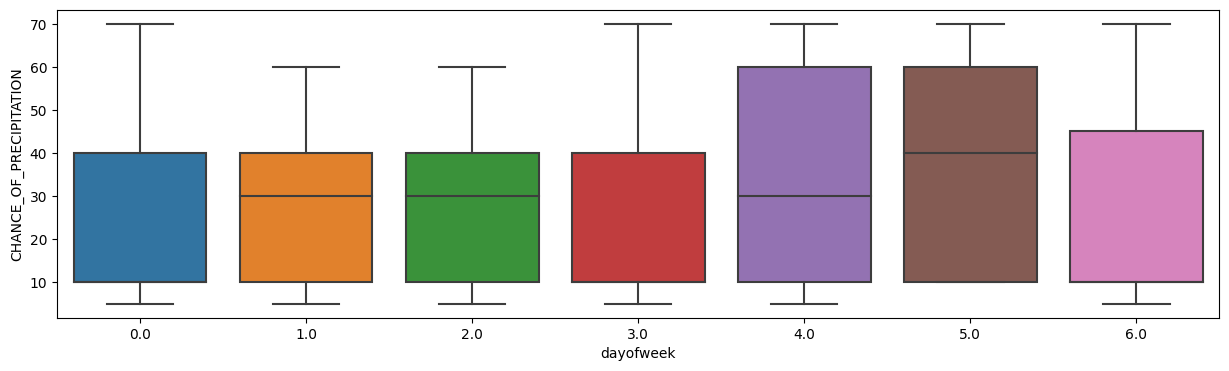

In [27]:
fig,ax = plt.subplots(figsize=(15,4))
sns.boxplot(data=df_time, x='dayofweek', y='CHANCE_OF_PRECIPITATION' )

After analyzing the data we can make some comments:
- I originally planned to use the Time Series Forecasting model for this data, but because the time data is seasonal but it is not continuous, it is not suitable.
- The target column is CHANCE_OF_PRECIPITATION also not continuous data, it is more like categorical data -> use bining to bring it to categorical variables
- Use common models to classify
Ex: Discision Tree, Neural Netw